# Do RKI numbers change retrospectively?

There was anecdotal evidence that the RKI numbers change retrospectively, in particular that for the last reported day they may be a little low (presumably because not all reports have arrived yet).

As a counter measure, we always ignore the last day of reported data - thus the RKI data seems to be one day behind the Johns Hopkins data in our plots.

Here, we'll try to get some quantitative evidence on that.

# Data gathering

We need to store data from a few subsequent days.

In [26]:
import coronavirus as cv

In [27]:
cv.clear_cache()

In [29]:
germany = cv.fetch_data_germany(include_last_day=True)

Please be patient - downloading data from https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv ...
Completed downloading 131221 rows in 45.3 seconds.


In [30]:
import datetime


In [31]:
date_time = datetime.datetime.now().strftime("%Y-%m-%d")
date_time

'2020-05-09'

In [32]:
germany.to_csv(f'rki-downloaded-{date_time}.csv.gz')

# Compare data sets

In [38]:
import os
import glob
import pandas as pd

files = glob.glob("rki-downloaded*csv.gz")
data_sets = {}
totals = pd.DataFrame()
for file in reversed(sorted(files)):
    date = file.split("rki-downloaded-")[1].split('.csv.gz')[0]
    df = pd.read_csv(file)
    data_sets[date] = df
    totals[date] = df.groupby('date').sum()['AnzahlFall']

In [39]:
totals

,2020-05-09,2020-05-08,2020-05-07
date,,,
2020-01-28,4,4,2.0
2020-01-29,2,2,2.0
2020-01-31,3,3,3.0
2020-02-03,1,1,1.0
2020-02-04,5,5,5.0
...,...,...,...
2020-05-03,423,423,422.0
2020-05-04,706,706,668.0
2020-05-05,1006,1006,NaN


In [54]:
data_sets['2020-05-09']['Meldedatum'].max()

'2020/05/07 00:00:00'

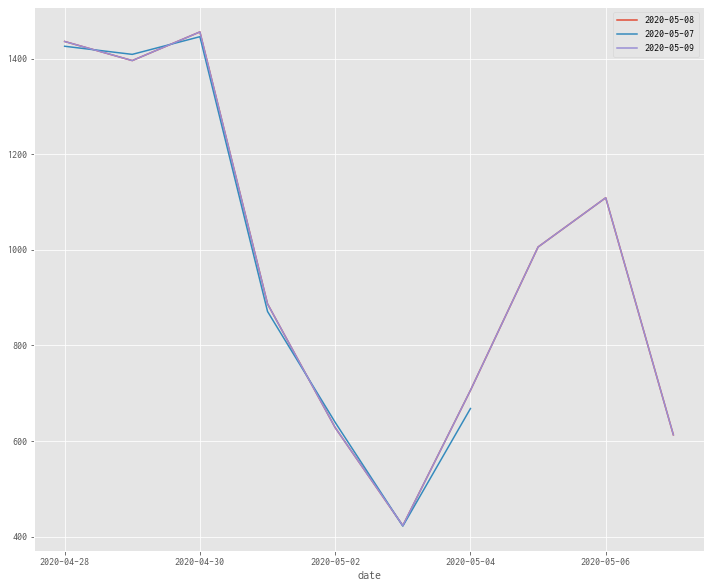

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 10))
# ax.plot(totals.index, tmp['AnzahlFall'])
totals.iloc[-10:].plot(ax=ax)

In [55]:

totals.tail(n=totals.shape[1]+5)

,2020-05-09,2020-05-08,2020-05-07
date,,,
2020-04-30,1456,1456,1446.0
2020-05-01,887,887,871.0
2020-05-02,628,628,639.0
2020-05-03,423,423,422.0
2020-05-04,706,706,668.0
2020-05-05,1006,1006,NaN
2020-05-06,1109,1109,NaN
2020-05-07,613,613,NaN
